## Adapting Stackix to work with unpaired Miracle data

In [1]:
import autoencodix as acx
import os
from autoencodix.configs.stackix_config import StackixConfig
from autoencodix.configs.default_config import DataConfig, DataInfo, DataCase
os.chdir("..")
os.getcwd()


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/Users/maximilianjoas/development/autoencodix_package'

In [2]:
import os

root_dir = os.path.join("data/miracle/Daten/Relevanten")
rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet" # TODO test with non filtered version including nans
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"
clin_file_nas = "2025-05-16_RESTING_clinical.parquet"

rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet"
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"

# Create a dictionary of DataInfo objects
data_info = {
    "RNA": DataInfo(file_path=os.path.join(root_dir, rna_file)),
    "clinical": DataInfo(file_path=os.path.join(root_dir, clin_file), data_type="ANNOTATION"),
    "mutation": DataInfo(file_path=os.path.join(root_dir, mut_file)),
    "radiology": DataInfo(file_path=os.path.join(root_dir, radio_con)),
    "cell_deconvolution": DataInfo(file_path=os.path.join(root_dir, cell_deco))
}

config = StackixConfig(
    data_config=DataConfig(
        data_info=data_info
    ),
    data_case=DataCase.MULTI_BULK,
    requires_paired=False,
    epochs = 100
)

stackix = acx.Stackix(config=config)

In [3]:
stackix.run()

preprocessing


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'RNA', 56 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_005', 'RESTING_008', 'RESTING_012', 'RESTING_013', 'RESTING_014', 'RESTING_018', 'RESTING_027', 'RESTING_028', 'RESTING_029', 'RESTING_030', 'RESTING_031', 'RESTING_036', 'RESTING_040', 'RESTING_047', 'RESTING_050', 'RESTING_060', 'RESTING_062', 'RESTING_066', 'RESTING_067', 'RESTING_068', 'RESTING_090', 'RESTING_091', 'RESTING_106', 'RESTING_107', 'RESTING_112', 'RESTING_114', 'RESTING_119', 'RESTING_127', 'RESTING_128', 'RESTING_129', 'RESTING_137', 'RESTING_140', 'RESTING_141', 'RESTING_143', 'RESTING_146', 'RESTING_149', 'RESTING_158', 'RESTING_162', 'RESTING_171', 'RESTING_174', 'RESTING_179', 'RESTING_181', 'RESTING_184', 'RESTING_185', 'RESTING_187', 'RESTING_207', 'RESTING_215', 'RESTING_226', 'RESTING_236', 'RESTING_253', 'RESTING_262', 'RESTING_265', 'REST

bulk_dfs keys in process_multi_bulk: dict_keys(['RNA', 'mutation', 'radiology', 'cell_deconvolution'])
--- Running Pairing-Aware Split ---
Identified 32 fully paired samples across all modalities.
Identified 91 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Training each modality model...
Training modality: RNA
Training modality: RNA
Epoch 1 - Train Loss: 655.9329
Sub-losses: recon_loss: 655.9317, var_loss: 0.0012, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 88.5784
Sub-losses: recon_loss: 88.5783, var_loss: 0.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 735.6030
Sub-losses: recon_loss: 735.6015, var_loss: 0.0015, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 92.9431
Sub-losses: recon_loss: 92.9431, var_loss: 0.0000, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 690.3612
Sub-losses: recon_

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x3349f36a0>, valid=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x3349f3d90>, test=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x3349f1f90>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 7 × 16
final_reconstruction: <autoen

Creating plots ...


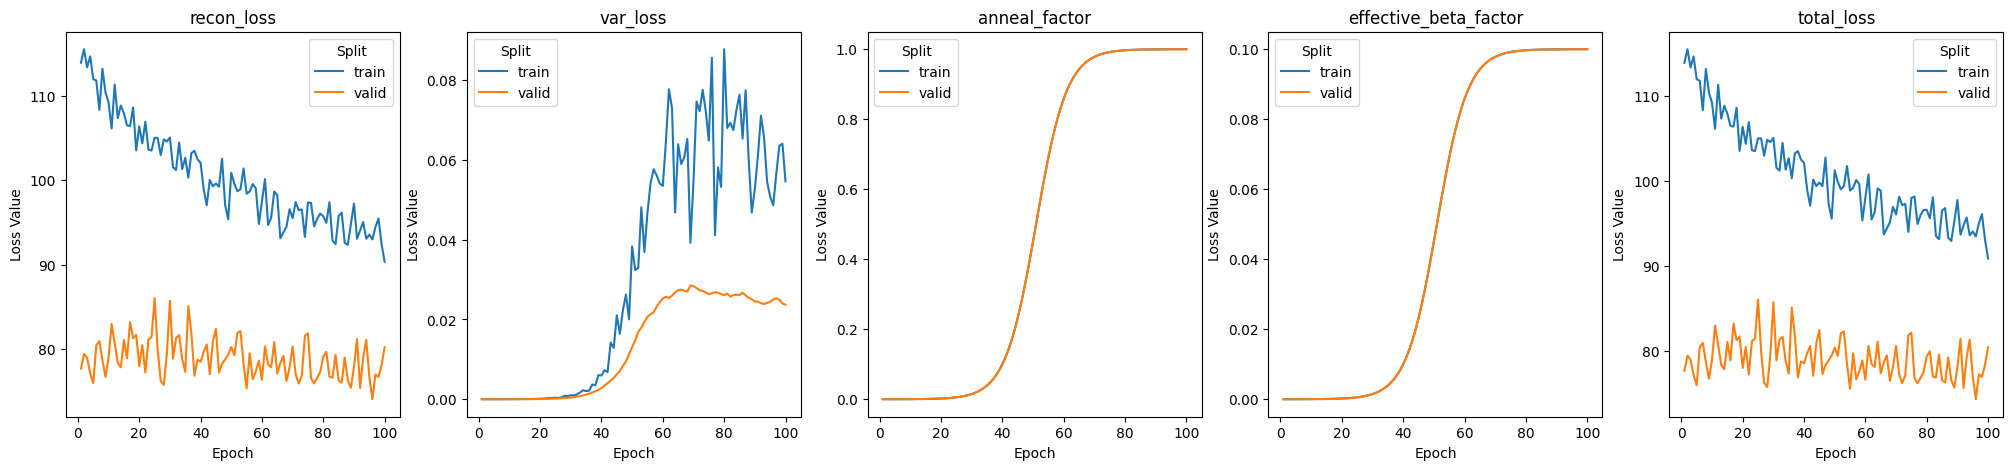

ValueError: No annotation data found. Please provide a valid annotation data type.

In [4]:
stackix.show_result()

In [ ]:
xmodalix = acx.XModalix(config=config)

In [ ]:
results = stackix._trainer._orchestrator.modality_results

In [ ]:
results["RNA"].sample_ids.get(epoch=-1, split="train")

In [ ]:
results["RNA"].reconstructions.get(epoch=-1)

In [ ]:
xmodalix.run()

In [ ]:

os.getcwd()